In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Text(0, 0.5, 'Y dataset')

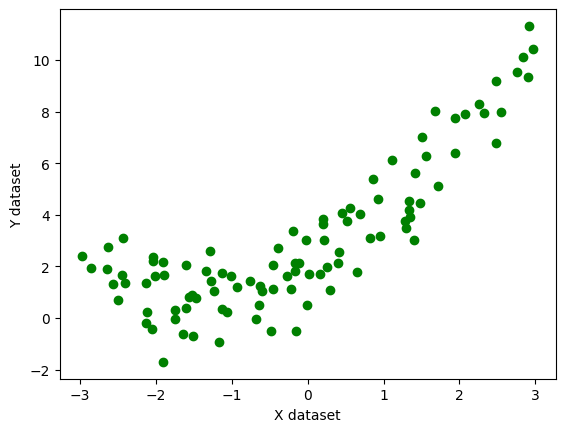

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers

plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Simple Linear Regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score

score = r2_score(y_test, regression.predict(X_test))
print(score)

0.7590910481919124


Text(0, 0.5, 'Y')

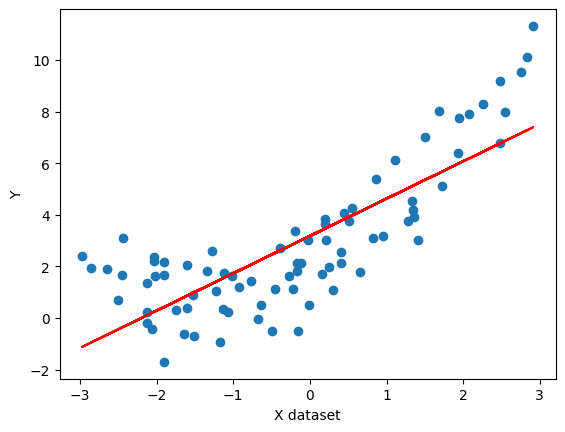

In [7]:
# visualize model
plt.plot(X_train, regression.predict(X_train), color='r')
plt.scatter(X_train, y_train)
plt.xlabel('X dataset')
plt.ylabel('Y')

In [8]:
# Polinomial Transformation
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [9]:
X_train_poly

array([[ 1.00000000e+00,  1.35247973e+00,  1.82920141e+00],
       [ 1.00000000e+00,  1.33978413e+00,  1.79502152e+00],
       [ 1.00000000e+00, -2.03617274e+00,  4.14599941e+00],
       [ 1.00000000e+00, -1.90508613e-01,  3.62935315e-02],
       [ 1.00000000e+00, -1.89867028e+00,  3.60494882e+00],
       [ 1.00000000e+00, -1.01026939e+00,  1.02064424e+00],
       [ 1.00000000e+00,  4.01753050e-01,  1.61405513e-01],
       [ 1.00000000e+00, -1.75166970e+00,  3.06834673e+00],
       [ 1.00000000e+00, -4.60849394e-01,  2.12382164e-01],
       [ 1.00000000e+00,  2.07195914e+00,  4.29301469e+00],
       [ 1.00000000e+00, -3.92614174e-01,  1.54145890e-01],
       [ 1.00000000e+00, -1.59976269e+00,  2.55924068e+00],
       [ 1.00000000e+00,  2.16053663e-01,  4.66791854e-02],
       [ 1.00000000e+00,  2.49162680e-01,  6.20820409e-02],
       [ 1.00000000e+00,  2.83441363e+00,  8.03390063e+00],
       [ 1.00000000e+00, -2.04043487e+00,  4.16337446e+00],
       [ 1.00000000e+00,  1.40575932e+00

In [10]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9466349594287912


In [11]:
print(f"Coefficient or slope: {regression.coef_}")
print(f"Intercept: {regression.intercept_}")

Coefficient or slope: [[0.         1.48695909 0.5053531 ]]
Intercept: [1.95277682]


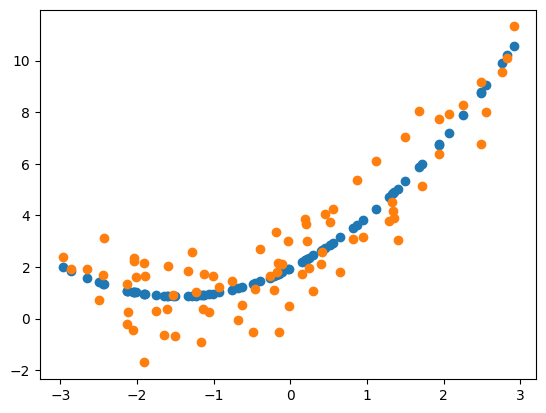

In [13]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [14]:
# prediction of new data

X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

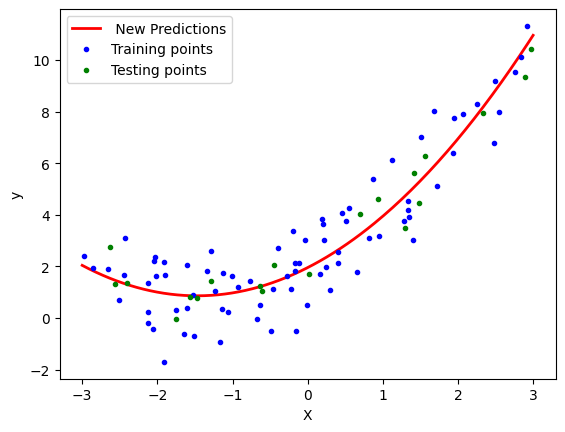

In [15]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts

In [ ]:
from sklearn.pipeline import Pipeline

def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

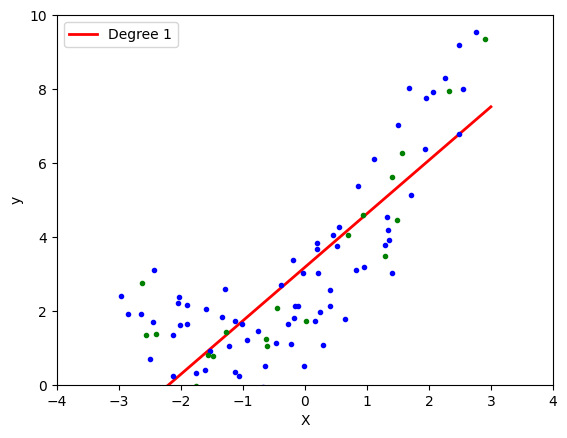

In [17]:
poly_regression(1)

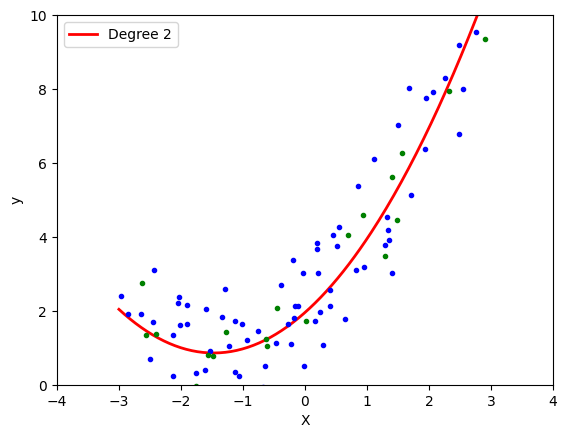

In [18]:
poly_regression(2)

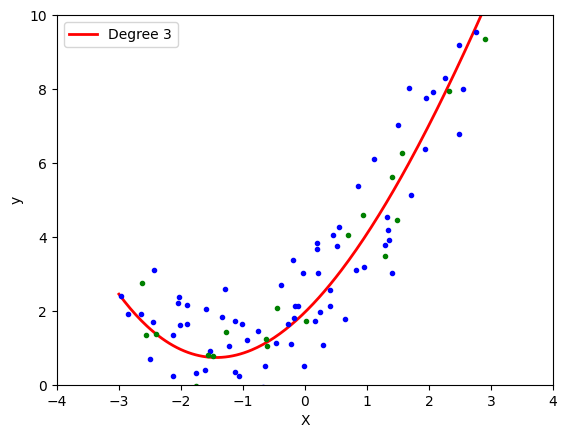

In [19]:
poly_regression(3)

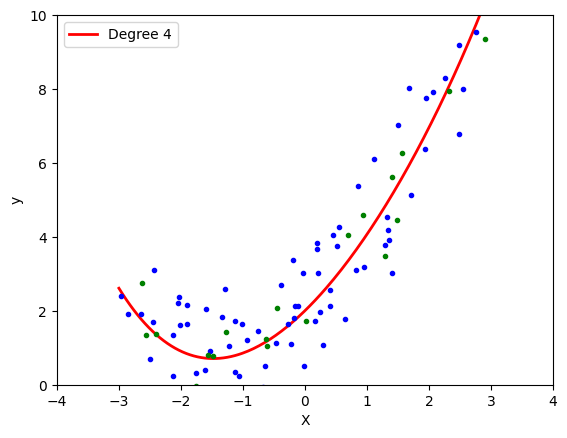

In [20]:
poly_regression(4)

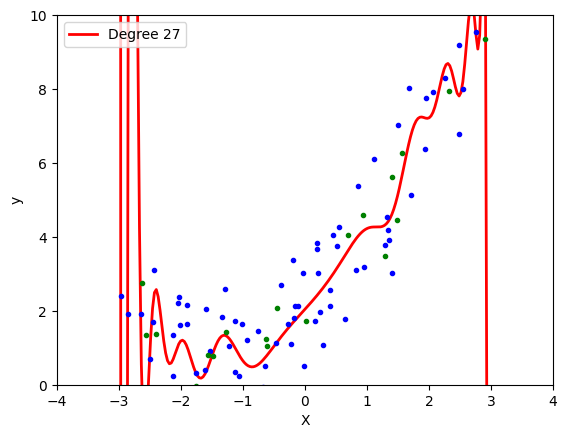

In [21]:
poly_regression(27)

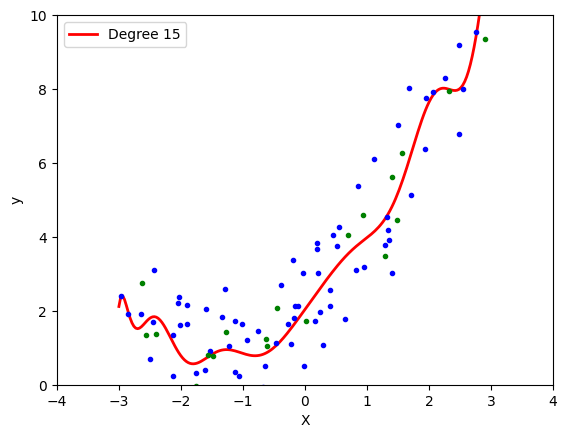

In [22]:
poly_regression(15)

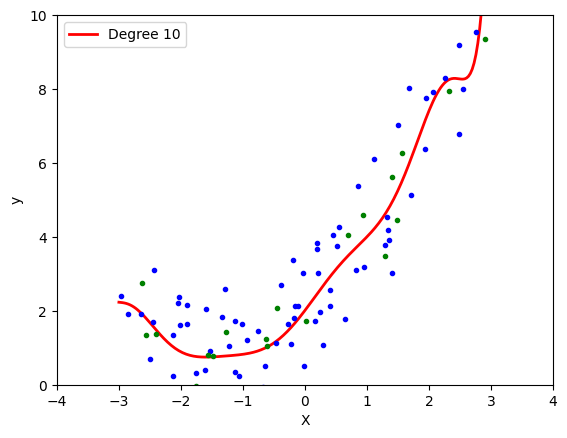

In [23]:
poly_regression(10)

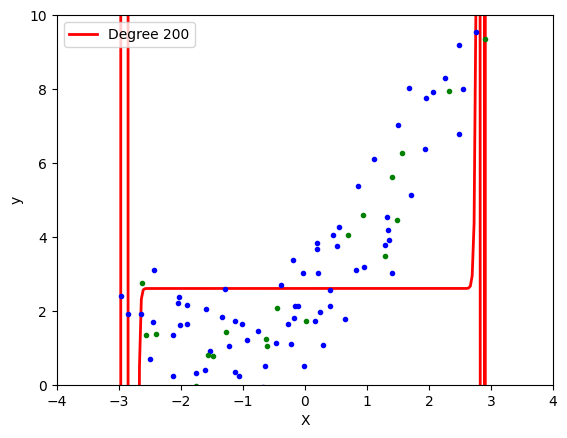

In [24]:
poly_regression(200)

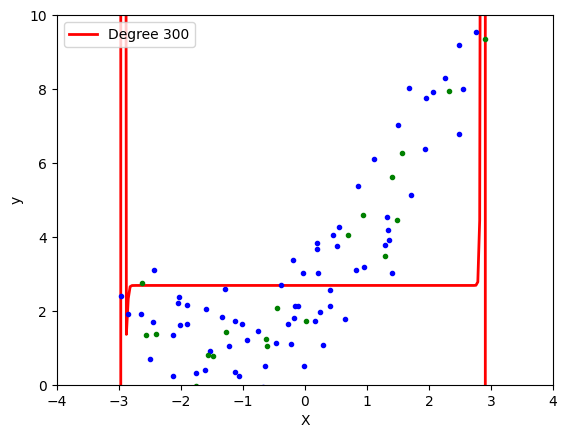

In [27]:
poly_regression(300)